# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

## 1 Carga de librerias, accesos y configuraciones.
___
___

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_context("talk")

In [3]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/1_Datasets
1.1_input_dataset.csv   1.3_clean_dataset.csv    1.5_encoding_dataset.csv
1.2_sample_dataset.csv  1.4_cluster_dataset.csv  1.6_pca_cluster_dataset.csv


In [4]:
df = pd.read_csv('1.3_clean_dataset.csv', index_col=0)

In [5]:
df.head(10)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,4.42,352,244,2003
1,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,3.79,152,1,2005
2,0767910435,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,Broadway Books,3.88,256,131,2004
3,0618391002,The Lord of the Rings: Weapons and Warfare,Chris Smith,Houghton Mifflin Harcourt,4.53,218,45,2003
4,0618510826,The Lord of the Rings: Complete Visual Companion,Jude Fisher,Houghton Mifflin Harcourt,4.50,224,6,2004
5,097669400X,Agile Web Development with Rails: A Pragmatic ...,Dave Thomas,Pragmatic Bookshelf,3.84,558,59,2005
6,1557344493,"Hatchet: A Guide for Using ""Hatchet"" in the Cl...",Donna Ickes,Teacher Created Resources,4.00,48,2,1994
7,0385326505,Guts: The True Stories behind Hatchet and the ...,Gary Paulsen,Delacorte Press,3.88,144,336,2001
8,1575606240,Molly Hatchet - 5 of the Best,Molly Hatchet,Cherry Lane Music Company,4.33,56,0,2003
9,1595580271,Hatchet Jobs: Writings on Contemporary Fiction,Dale Peck,The New Press,3.46,228,16,2005


___
___

## 2 Análisis exploratorio de los datos (EDA)
___


### 2.1 Variables numericas

In [6]:
num_df = df[list(df.columns[df.dtypes != object])]
num_df.sample(5)

,Rating,pagesNumber,CountsOfReview,PublishYear
2698,4.03,290,83,2005
5047,3.86,189,0,2006
9060,3.81,246,185,1986
5475,3.60,191,1,2003
12437,3.82,247,127,1987


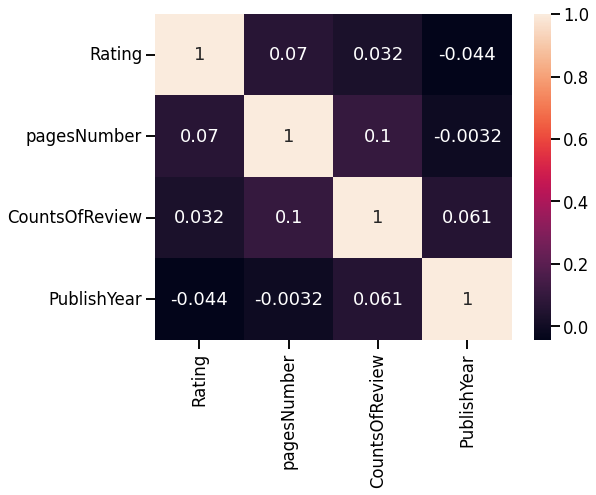

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True)
plt.show()

### 2.2 Histogramas

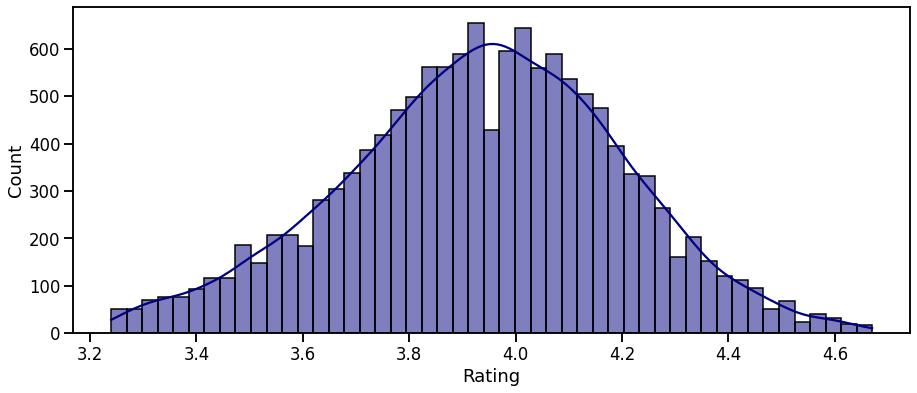

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['Rating'], color="navy", kde=True)

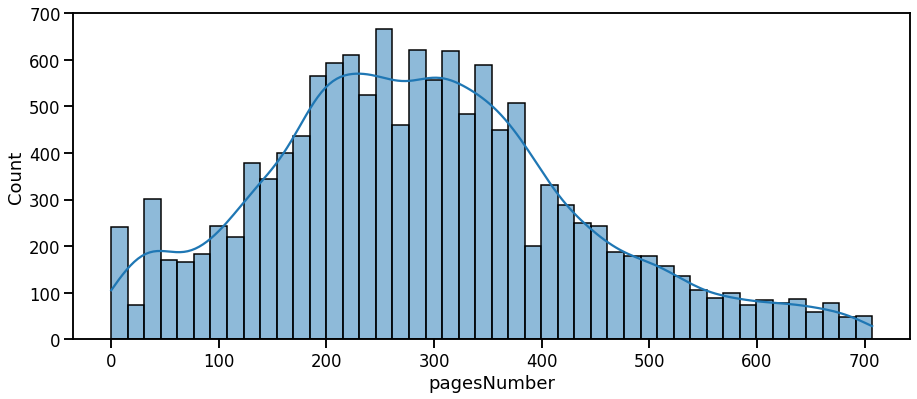

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['pagesNumber'], kde=True)

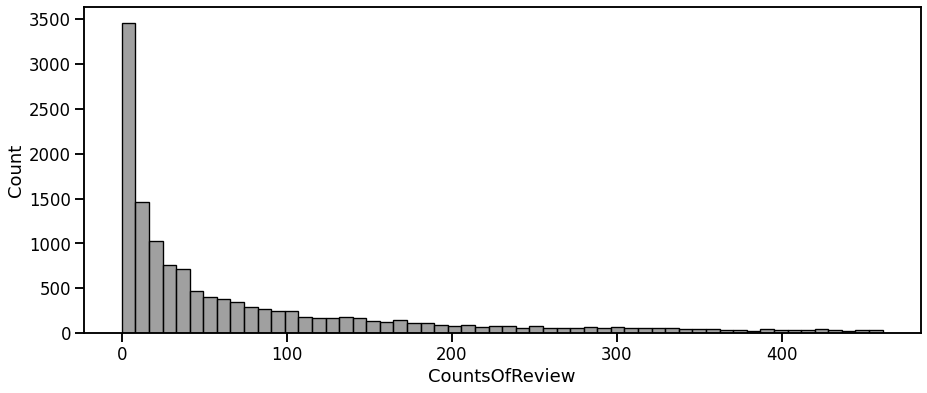

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['CountsOfReview'], color="grey")

In [ ]:
df['CountsOfReview'].describe()

count    13405.000000
mean        78.098620
std        102.706496
min          0.000000
25%          8.000000
50%         32.000000
75%        106.000000
max        461.000000
Name: CountsOfReview, dtype: float64

In [ ]:
df['CountsOfReview'].quantile(0.80)

137.0

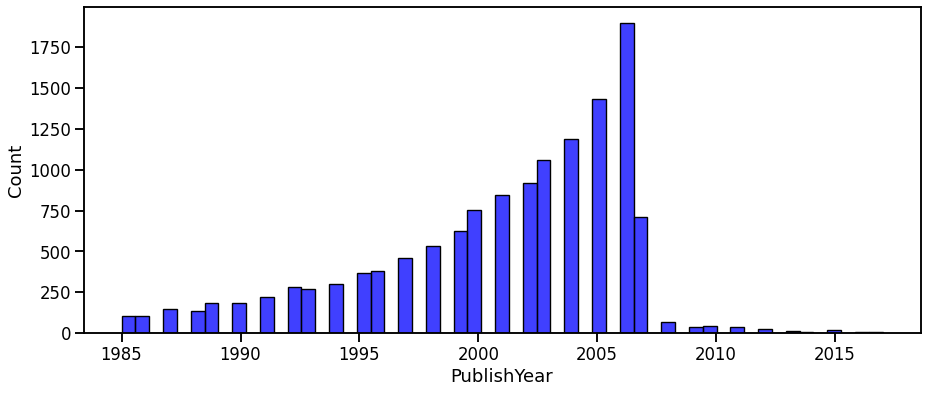

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['PublishYear'],color="blue")

### 2.3 Evolución

In [ ]:
num_df.columns

Index(['Rating', 'pagesNumber', 'CountsOfReview', 'PublishYear'], dtype='object')

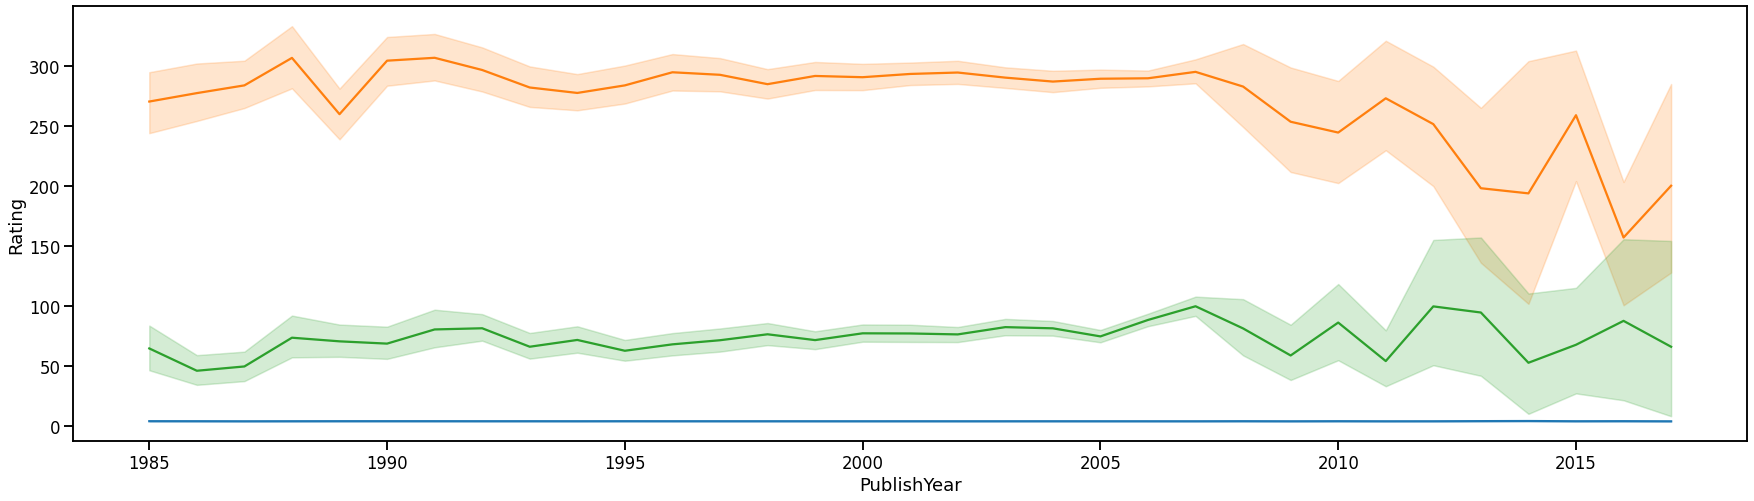

In [ ]:
plt.figure(figsize=(30, 8))

for col in num_df.drop(columns=['PublishYear']):
    sns.lineplot(data=df, x=df['PublishYear'], y=df[col])

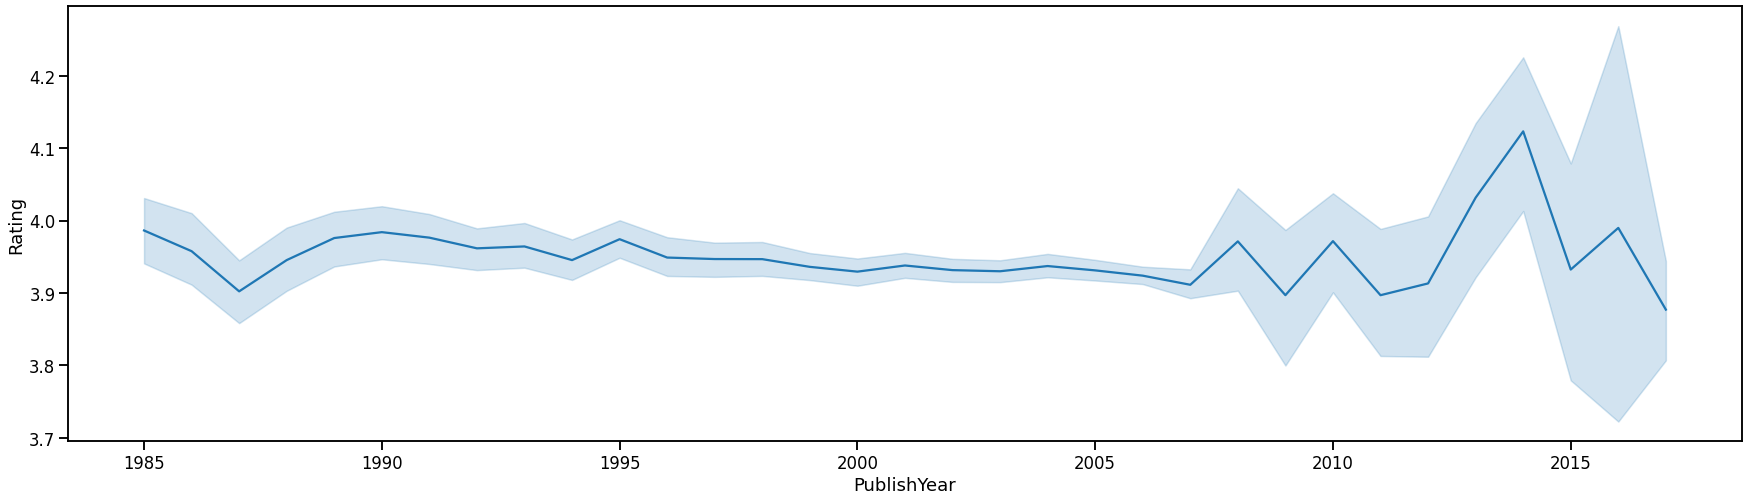

In [ ]:
# Requiere una otra escala.

plt.figure(figsize=(30, 8))
sns.lineplot(data=df, x=df['PublishYear'], y=df['Rating'])

### 2.3 Conjeturas

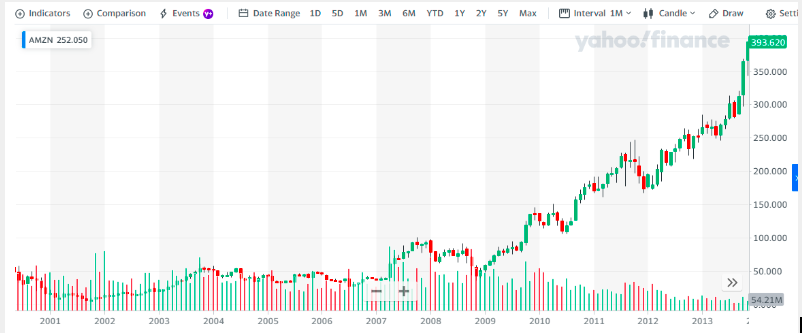

___
___